In [ ]:
import gdown
url = "https://drive.google.com/file/d/1-p5VTyRlTjIEAzvHsZuuLEIfJW7UnMiG/view?usp=sharing"
gdown.download(url=url, output='data52_split.rar', fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1-p5VTyRlTjIEAzvHsZuuLEIfJW7UnMiG
From (redirected): https://drive.google.com/uc?id=1-p5VTyRlTjIEAzvHsZuuLEIfJW7UnMiG&confirm=t&uuid=6afd6dc3-a018-4caa-9c81-1bae5eb81289
To: /content/data52_split.rar
100%|██████████| 112M/112M [00:03<00:00, 32.4MB/s]


'data52_split.rar'

In [ ]:
!unrar x data52_split.rar > /dev/null 2>&1

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pickle
from tensorflow.keras.layers import *
from os import listdir
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define paths
train_dir = 'data52_split/train'
val_dir = 'data52_split/val'
test_dir = 'data52_split/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 8812 images belonging to 52 classes.
Found 1762 images belonging to 52 classes.
Found 1202 images belonging to 52 classes.


In [ ]:
from tensorflow.keras.layers import Input, SeparableConv2D, Concatenate, GlobalAveragePooling2D, Dense, multiply, Activation, AveragePooling2D, BatchNormalization, Dropout

base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = True

# Add new top layers
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the new model
model = Model(inputs=inputs, outputs=predictions)

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    # validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50
)

# Lưu mô hình cuối cùng
model.save('final_mobileNetV3.h5')

# # Đọc lại mô hình tốt nhất
# best_model = load_model('best_model.h5')

# # Đánh giá mô hình tốt nhất trên tập test
# results_best = best_model.evaluate(X_test, y_test)
# print('Best Test loss: {:4f}'.format(results_best[0]))
# print('Best Test accuracy: {:4f}'.format(results_best[1]))

Epoch 1/50
138/138 [==============================] - 167s 935ms/step - loss: 0.5776 - accuracy: 0.8318 - val_loss: 0.2007 - val_accuracy: 0.9342
Epoch 2/50
138/138 [==============================] - 120s 868ms/step - loss: 0.1356 - accuracy: 0.9601 - val_loss: 0.0945 - val_accuracy: 0.9677
Epoch 3/50
138/138 [==============================] - 122s 884ms/step - loss: 0.1077 - accuracy: 0.9683 - val_loss: 0.1142 - val_accuracy: 0.9671
Epoch 4/50
138/138 [==============================] - 121s 871ms/step - loss: 0.0877 - accuracy: 0.9730 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 5/50
138/138 [==============================] - 121s 878ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.1793 - val_accuracy: 0.9620
Epoch 6/50
138/138 [==============================] - 122s 885ms/step - loss: 0.1254 - accuracy: 0.9650 - val_loss: 0.1187 - val_accuracy: 0.9631
Epoch 7/50
138/138 [==============================] - 121s 869ms/step - loss: 0.0879 - accuracy: 0.9733 - val_loss: 0.0889 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Đọc lại và đánh giá mô hình cuối cùng
final_model = load_model('final_mobileNetV3.h5')
results_final = final_model.evaluate(test_generator)
print('Final Test loss: {:4f}'.format(results_final[0]))
print('Final Test accuracy: {:4f}'.format(results_final[1]))

19/19 [==============================] - 6s 238ms/step - loss: 0.0158 - accuracy: 0.9950
Final Test loss: 0.015750
Final Test accuracy: 0.995008


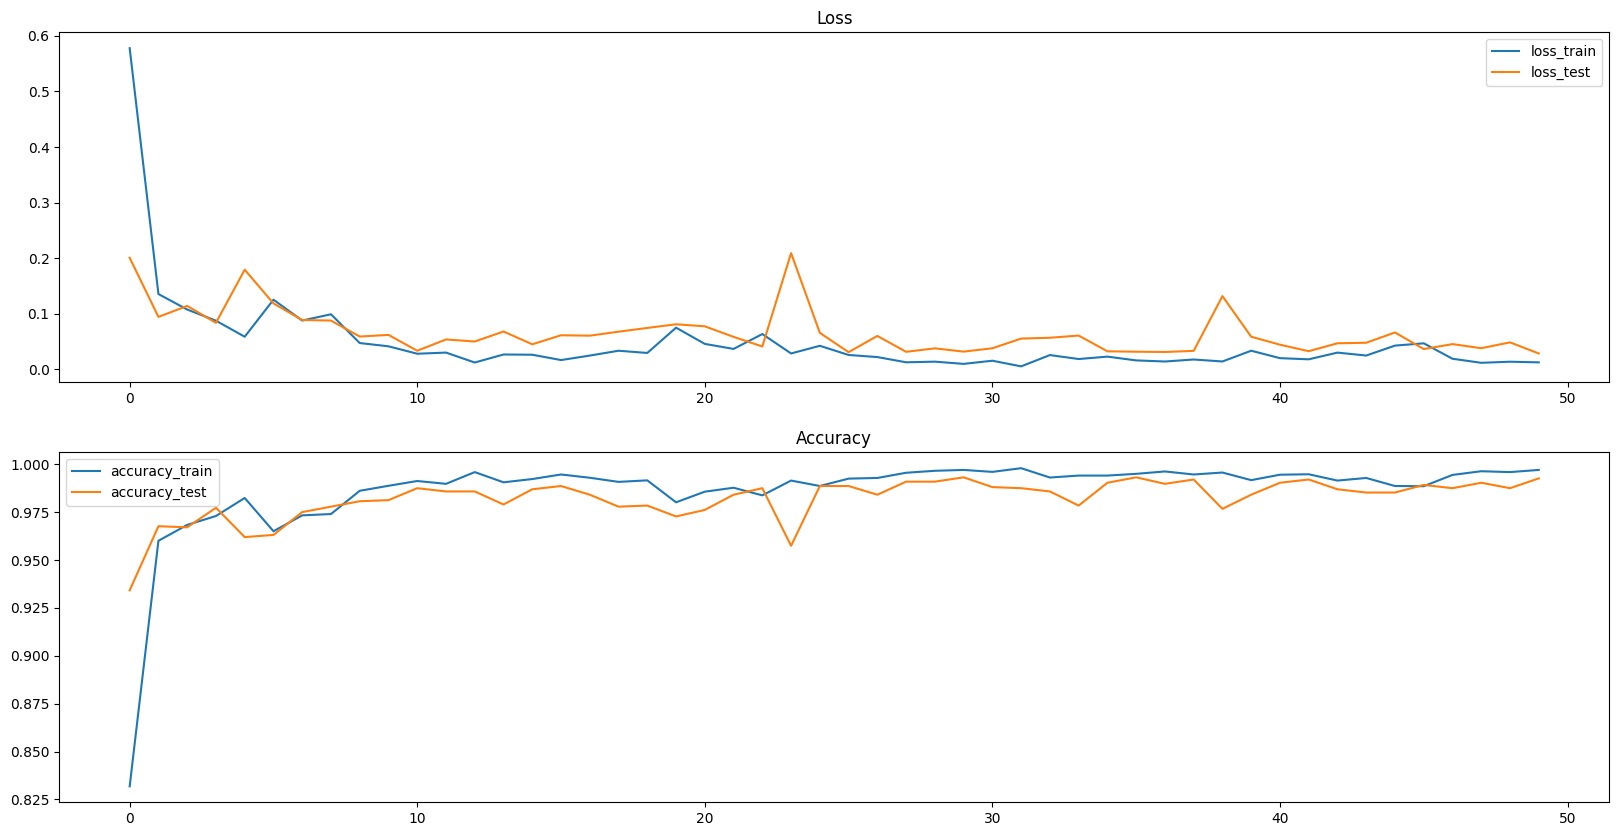

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Biểu đồ Loss và Accuracy
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='loss_train')
plt.plot(history.history['val_loss'], label='loss_test')
plt.legend()

# Biểu đồ Accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy_train')
plt.plot(history.history['val_accuracy'], label='accuracy_test')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Đánh giá mô hình tốt nhất trên tập test
y_pred_best = final_mobileNetV3.predict(X_test)
y_pred_classes_best = np.argmax(y_pred_best, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report (bao gồm F1)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes_best))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes_best)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes_best)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes_best, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes_best, average='weighted')
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes_best, average='weighted')
print(f"F1 Score: {f1:.4f}")


NameError: name 'final_mobileNetV3' is not defined

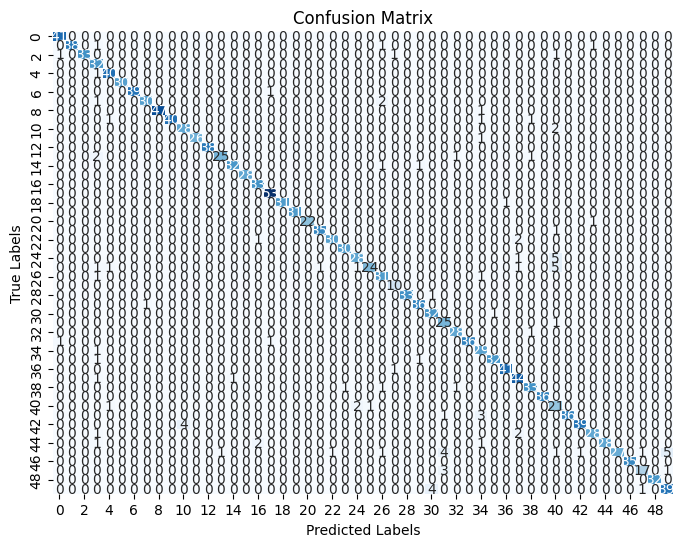

In [ ]:
import seaborn as sns

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

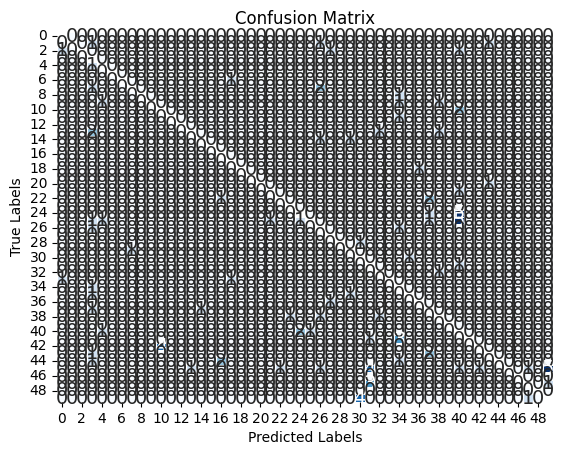

Error Rate for class 0: 0.0000
Error Rate for class 1: 0.0732
Error Rate for class 2: 0.0833
Error Rate for class 3: 0.0000
Error Rate for class 4: 0.0244
Error Rate for class 5: 0.0000
Error Rate for class 6: 0.0250
Error Rate for class 7: 0.0909
Error Rate for class 8: 0.0208
Error Rate for class 9: 0.0698
Error Rate for class 10: 0.0667
Error Rate for class 11: 0.0370
Error Rate for class 12: 0.0000
Error Rate for class 13: 0.1379
Error Rate for class 14: 0.0588
Error Rate for class 15: 0.0000
Error Rate for class 16: 0.0000
Error Rate for class 17: 0.0000
Error Rate for class 18: 0.0312
Error Rate for class 19: 0.0000
Error Rate for class 20: 0.0435
Error Rate for class 21: 0.0278
Error Rate for class 22: 0.0909
Error Rate for class 23: 0.0000
Error Rate for class 24: 0.1765
Error Rate for class 25: 0.2941
Error Rate for class 26: 0.0606
Error Rate for class 27: 0.0000
Error Rate for class 28: 0.0294
Error Rate for class 29: 0.0270
Error Rate for class 30: 0.0303
Error Rate for cla

In [ ]:
import seaborn as sns
import numpy as np

# Get the diagonal elements (correct predictions)
correct_predictions = np.diag(conf_matrix)

# Get the total samples for each true class
total_samples_per_class = conf_matrix.sum(axis=1)

# Calculate the error rate for each class
error_rate_per_class = 1 - correct_predictions / total_samples_per_class.astype(float)

# Replace NaN values (which occur when the total_samples_per_class is zero) with zero
error_rate_per_class = np.nan_to_num(error_rate_per_class)

# Create a mask to highlight misclassifications
mask = np.zeros_like(conf_matrix)
mask[np.arange(len(conf_matrix)), np.arange(len(conf_matrix))] = 1

# Set different color for misclassifications
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, mask=mask, linewidths=.5, annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display error rates for each class
for i, error_rate in enumerate(error_rate_per_class):
    print(f"Error Rate for class {i}: {error_rate:.4f}")

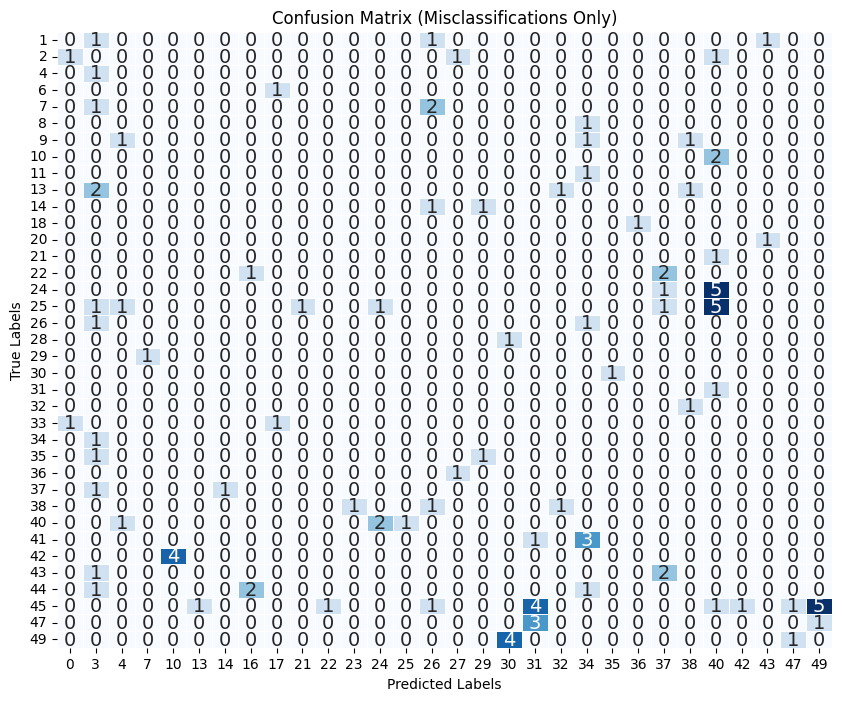

The two classes most frequently misclassified are 24 and 40 with 5 misclassifications.


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
# Get the indices of the misclassifications
misclassified_indices = np.where(y_true_classes != y_pred_classes_best)[0]

# Create a DataFrame to store the misclassifications
misclassified_df = pd.DataFrame({'True': y_true_classes[misclassified_indices],
                                  'Predicted': y_pred_classes_best[misclassified_indices]})

# Create a cross-tabulation of the misclassifications
confusion_matrix_df = pd.crosstab(misclassified_df['True'], misclassified_df['Predicted'], rownames=['True'], colnames=['Predicted'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=.5, annot_kws={"size": 14})
plt.title("Confusion Matrix (Misclassifications Only)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Identify the class pair with the highest number of misclassifications
max_misclassifications = confusion_matrix_df.values.max()
most_confused_classes = np.where(confusion_matrix_df.values == max_misclassifications)

class1 = confusion_matrix_df.index[most_confused_classes[0][0]]
class2 = confusion_matrix_df.columns[most_confused_classes[1][0]]

print(f"The two classes most frequently misclassified are {class1} and {class2} with {max_misclassifications} misclassifications.")